In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


2024-05-30 11:25:44.450372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 11:25:44.450489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 11:25:44.587702: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


def plot_accuracy(history):
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="validation")
    plt.legend()
    plt.show()


def plot_loss(history):
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="validation")
    plt.legend()
    plt.show()


def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

In [3]:
train_ds = image_dataset_from_directory(
    directory="/kaggle/input/cars-image-dataset/Cars Dataset/train",
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256, 256),
)


test_ds = image_dataset_from_directory(
    directory="/kaggle/input/cars-image-dataset/Cars Dataset/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


# **EFFICENTNET**

In [4]:
efficientnet = EfficientNetB0(include_top=False, input_shape=(256, 256, 3), classes=8)

efficientnet.trainable = True
model1 = Sequential([
    efficientnet,
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.1),
    Dense(256, activation="relu"),
    Dropout(0.1),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(100, activation="softmax")
])

model1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model1.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


I0000 00:00:1717068463.531149      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.4355 - loss: 2.7682 - val_accuracy: 0.1304 - val_loss: 2.5382
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.9426 - loss: 0.1925 - val_accuracy: 0.1304 - val_loss: 2.7233
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.9758 - loss: 0.0903 - val_accuracy: 0.2448 - val_loss: 2.4091
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - accuracy: 0.9734 - loss: 0.0906 - val_accuracy: 0.0689 - val_loss: 2.8158
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.9835 - loss: 0.0493 - val_accuracy: 0.1956 - val_loss: 2.7229
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.9799 - loss: 0.0651 - val_accuracy: 0.0849 - val_loss: 4.1970
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.9763 - loss: 0.0937 - val_accuracy: 0.1574 - val_loss: 3.0450
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.9638 - loss: 0.1318 - val_accuracy: 

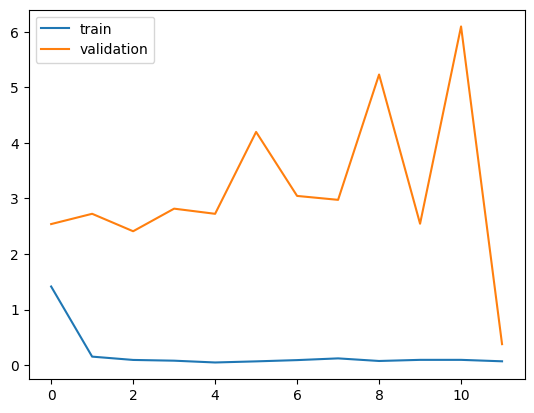

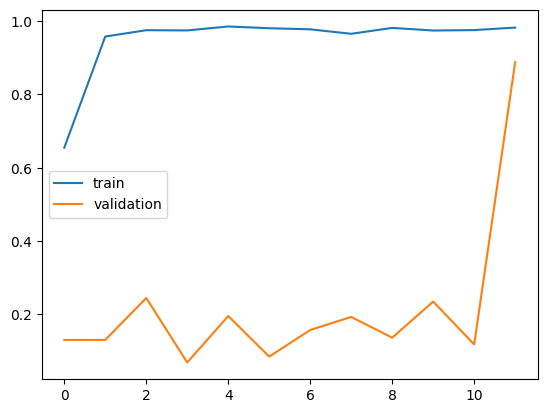

26/26 - 1s - 43ms/step - accuracy: 0.8881 - loss: 0.3763
Test Accuracy: 0.8880688548088074


In [5]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model1.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

# **DenseNet**

In [6]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

densenet = DenseNet121(
    input_shape=(256, 256, 3), include_top=False, weights="imagenet", classes=8
)

densenet.trainable = False
model2 = Sequential()
model2.add(densenet)
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.1))
model2.add(Dense(256, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation="softmax"))

model2.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model2.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.3307 - loss: 3.5226 - val_accuracy: 0.8450 - val_loss: 0.5413
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.8100 - loss: 0.5510 - val_accuracy: 0.8942 - val_loss: 0.3579
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8966 - loss: 0.3084 - val_accuracy: 0.9250 - val_loss: 0.2637
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9345 - loss: 0.2018 - val_accuracy: 0.8868 - val_loss: 0.3246
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.9547 - loss: 0.1303 - val_accuracy: 0.9151 - val_loss: 0.3182
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9670 - loss: 0.0897 - val_accuracy: 0.9225 - val_loss: 0.2688
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.9771 - loss: 0.0734 - val_accuracy: 0.9151 - val_loss: 0.3138
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms

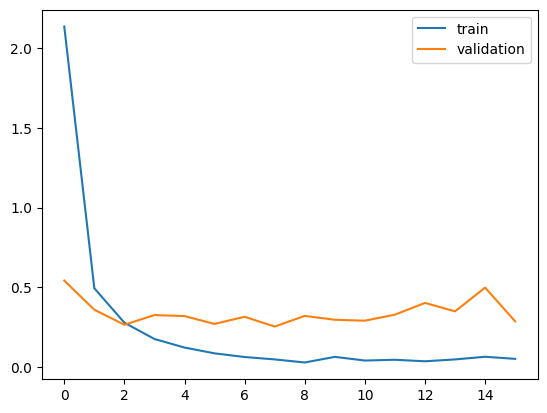

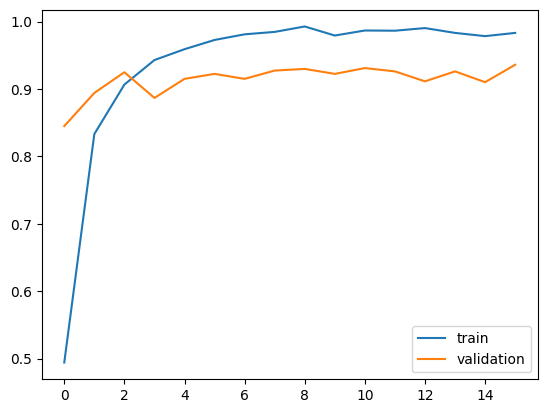

26/26 - 2s - 67ms/step - accuracy: 0.9360 - loss: 0.2849
Test Accuracy: 0.936039388179779


In [7]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model2.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

# **VGG19**

In [8]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Define the VGG19 model
vgg19 = VGG19(
    input_shape=(256, 256, 3), include_top=False, weights="imagenet", classes=8
)

vgg19.trainable = False
model3 = Sequential()
model3.add(vgg19)
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.1))
model3.add(Dense(256, activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(100, activation="softmax"))

model3.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model3.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


2024-05-30 11:36:56.487702: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[64,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-30 11:36:57.335981: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.97774, expected 2.11937
2024-05-30 11:36:57.336037: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.05083, expected 3.19246
2024-05-30 11:36:57.336053: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.52967, expected 3.6713
2024-05-30 11:36:57.336064: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Di

52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.2922 - loss: 2.5225

2024-05-30 11:37:48.339680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.32017, expected 2.40063
2024-05-30 11:37:48.339738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.56158, expected 3.64204
2024-05-30 11:37:48.339747: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.87333, expected 3.95378
2024-05-30 11:37:48.339755: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.04232, expected 5.12277
2024-05-30 11:37:48.339763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.6563, expected 5.73676
2024-05-30 11:37:48.339771: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.88616, expected 5.96662
2024-05-30 11:37:48.339779: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.61428, expected 5.69474
2024-05-30 11:37:48.339787: E external/local_xla/xla/ser

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.2950 - loss: 2.5095

2024-05-30 11:38:08.116694: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 3.31777, expected 2.61172
2024-05-30 11:38:08.116753: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 5.10329, expected 4.39724
2024-05-30 11:38:08.116763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 4.80913, expected 4.10308
2024-05-30 11:38:08.116771: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65544: 5.33366, expected 4.62762
2024-05-30 11:38:08.116779: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65545: 5.00267, expected 4.29663
2024-05-30 11:38:08.116786: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65546: 4.93559, expected 4.22954
2024-05-30 11:38:08.116794: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65547: 5.39283, expected 4.68678
2024-05-30 11:38:08.116802:

53/53 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.2976 - loss: 2.4970 - val_accuracy: 0.5904 - val_loss: 1.1497
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 239ms/step - accuracy: 0.6825 - loss: 0.9742 - val_accuracy: 0.6224 - val_loss: 1.0708
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.7949 - loss: 0.6572 - val_accuracy: 0.6384 - val_loss: 1.0447
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.7900 - loss: 0.6611 - val_accuracy: 0.5400 - val_loss: 1.4027
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.8554 - loss: 0.4252 - val_accuracy: 0.5633 - val_loss: 1.9976
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 0.7676 - loss: 0.7662 - val_accuracy: 0.6593 - val_loss: 1.0551
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - accuracy: 0.8534 - loss: 0.4793 - val_accuracy: 0.6273 - val_loss: 1.0137
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.8918 - loss: 0.3514 - val_accuracy: 

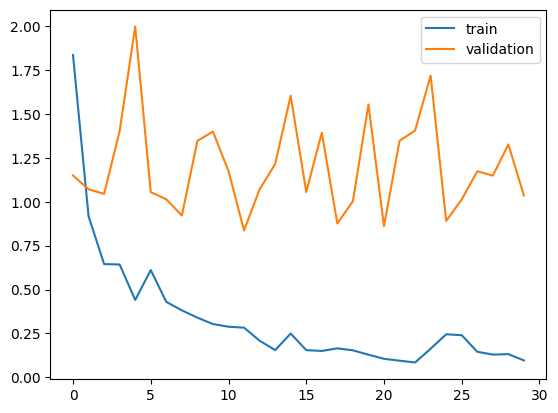

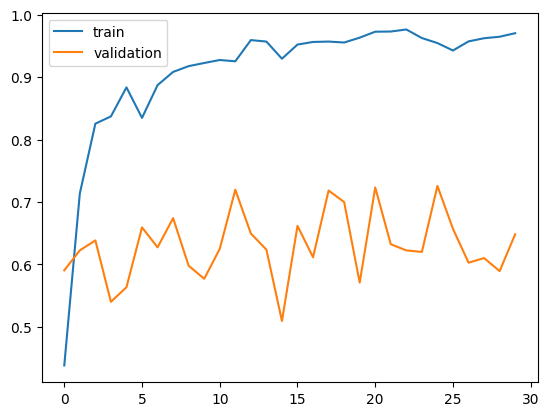

26/26 - 3s - 101ms/step - accuracy: 0.6519 - loss: 1.0350
Test Accuracy: 0.6519064903259277


In [9]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model3.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

# **ResNet**

In [10]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import Sequential
resnet = ResNet50V2(
    input_shape=(256,256, 3), include_top=False, weights="imagenet", classes=8
)
resnet.trainable = False
model4 = Sequential()
model4.add(resnet)
model4.add(Flatten())
model4.add(Dropout(0.1))
model4.add(Dense(256, activation="leaky_relu"))
model4.add(Dropout(0.1))
model4.add(Dense(128, activation="leaky_relu"))
model4.add(Dropout(0.1))
model4.add(Dense(100, activation="softmax"))

model4.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model4.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 635ms/step - accuracy: 0.4595 - loss: 10.9457 - val_accuracy: 0.8401 - val_loss: 0.9382
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9017 - loss: 0.5192 - val_accuracy: 0.8807 - val_loss: 0.7588
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9665 - loss: 0.1270 - val_accuracy: 0.8942 - val_loss: 0.8604
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9757 - loss: 0.0929 - val_accuracy: 0.8881 - val_loss: 0.9326
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9798 - loss: 0.0739 - val_accuracy: 0.8795 - val_loss: 1.0984
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.9801 - loss: 0.0947 - val_accuracy: 0.8795 - val_loss: 1.4131
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9809 - loss: 0.1190 - val_accuracy: 0.8795 - val_loss: 1.2820
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 13

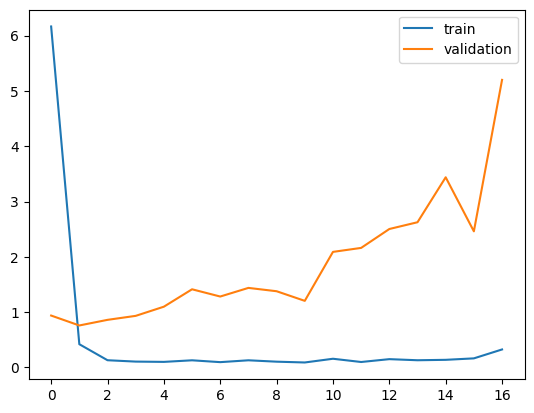

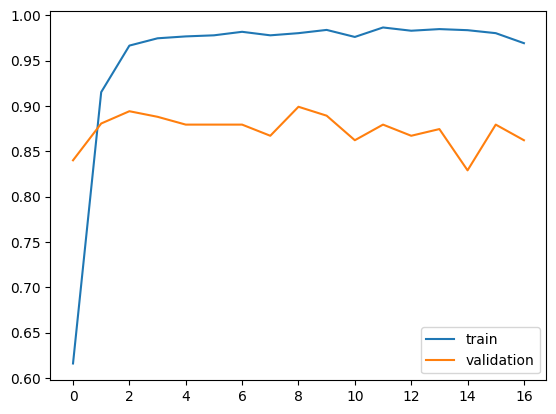

26/26 - 1s - 57ms/step - accuracy: 0.8622 - loss: 5.1994
Test Accuracy: 0.8622386455535889


In [11]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model4.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
[6]


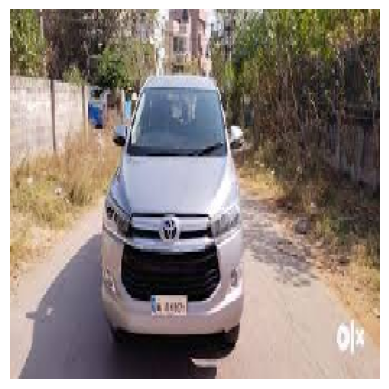

Toyota


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova/1030.jpg"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array/=255.0
# img_array = preprocess_input(img_array)

# Make predictions
# predictions = model.predict(img_array)

# Decode the predictions
predicted_class = np.argmax(model2.predict(img_array),axis=1)
# confidence = predictions[0][predicted_class]

# Display the results
plt.imshow(img)
plt.axis('off')
print(predicted_class)
plt.show()
if predicted_class == 0:
    print("Audi")
elif predicted_class == 1:
    print("Hyundai")
elif predicted_class == 2:
        print("Mahindra")
elif predicted_class == 3:
        print("RR")
elif predicted_class == 4:
        print("Maruti")
elif predicted_class == 5:
        print("Tata")
elif predicted_class == 6:
        print("Toyota")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


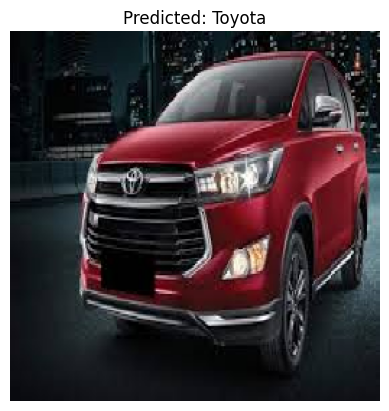

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


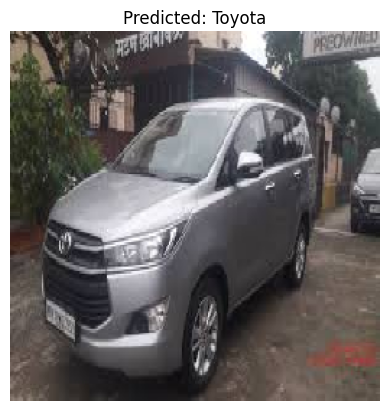

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


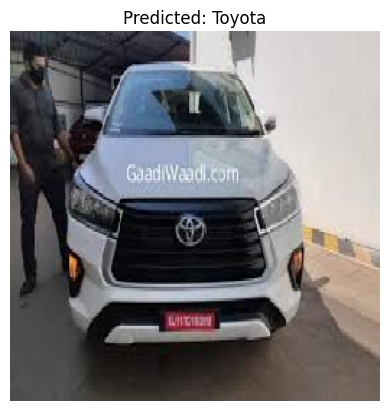

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


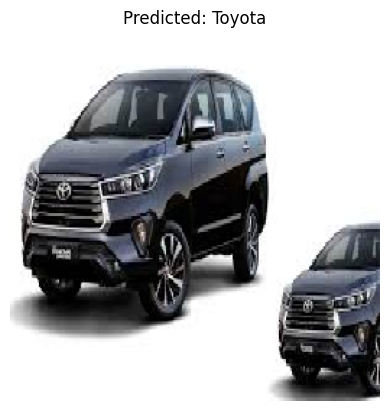

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


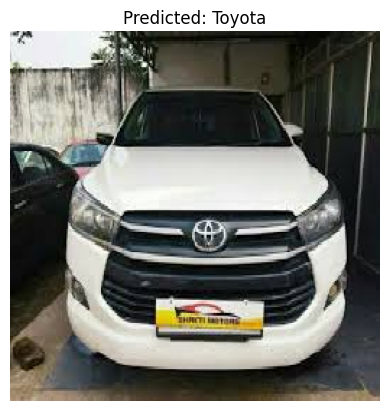

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


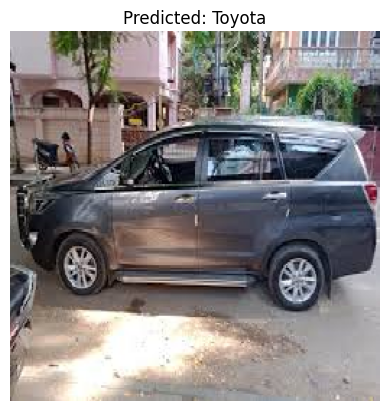

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


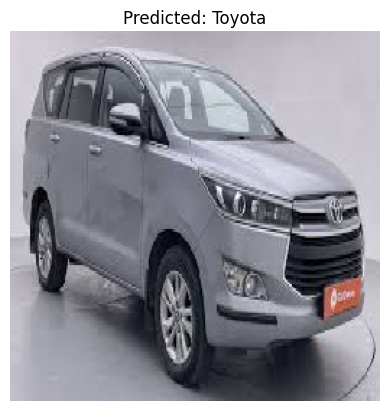

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


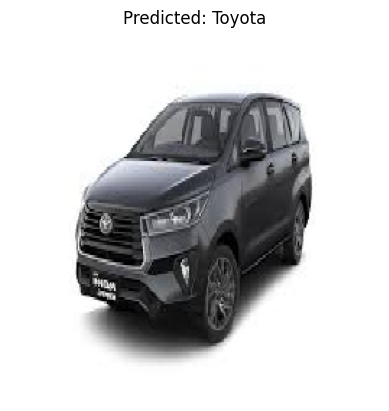

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


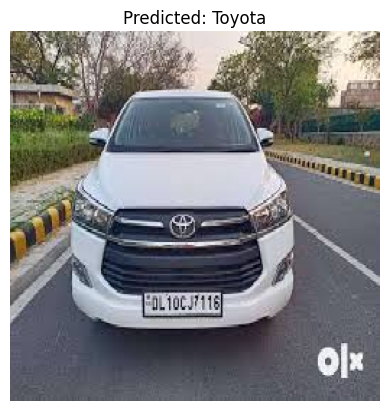

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


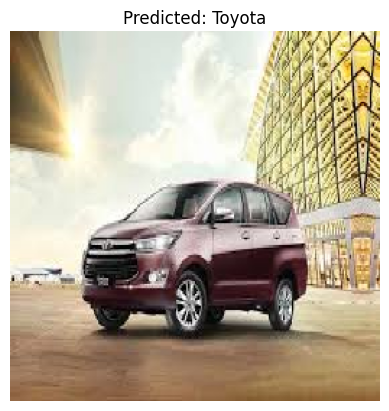

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


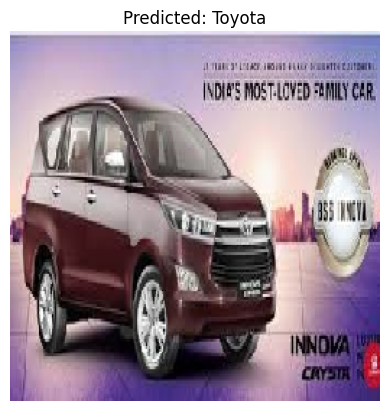

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


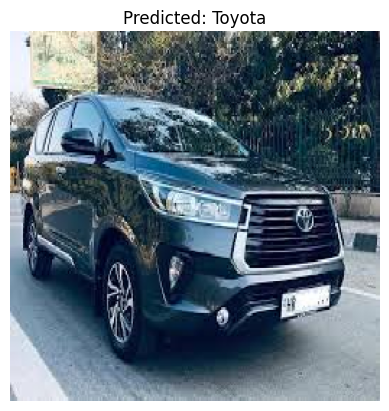

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


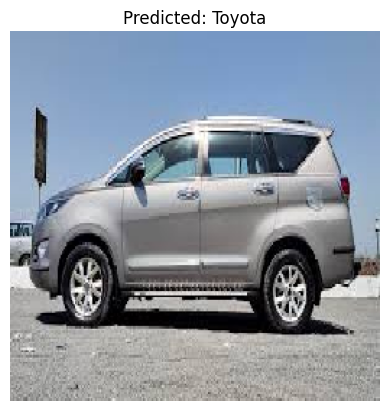

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


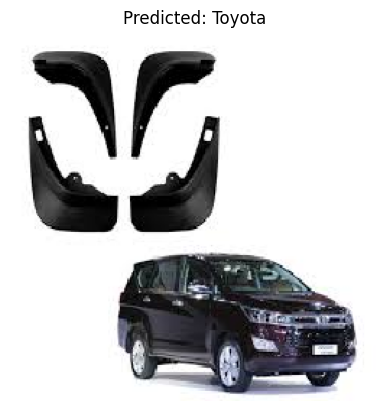

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


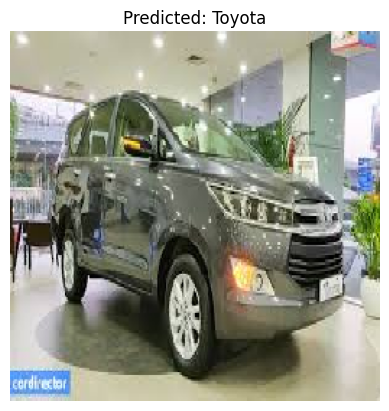

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


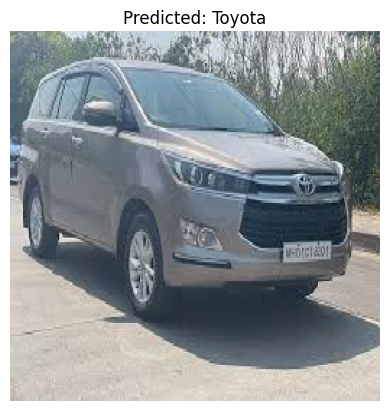

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


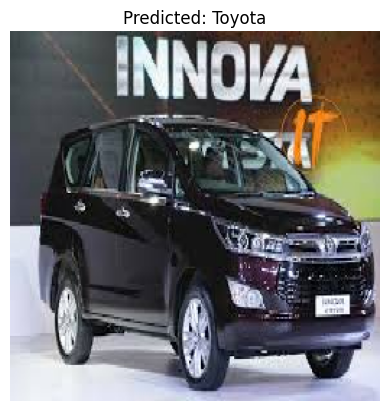

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


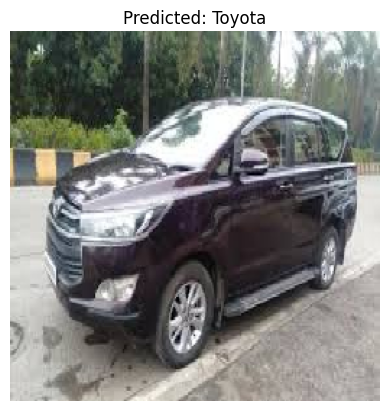

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


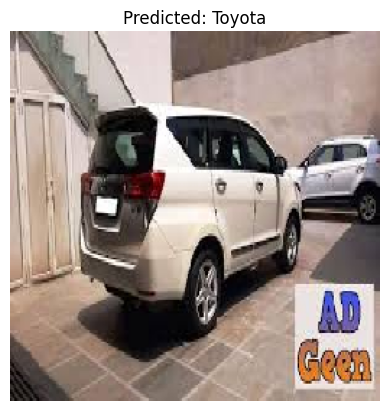

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


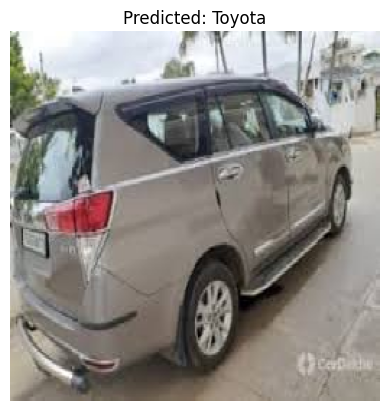

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Path to the test dataset directory
test_dir = "/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova"

# Filter out directories from the list of files
test_files = [file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, file))]

# Randomly select 10 images
random_images = random.sample(test_files, min(20, len(test_files)))

for img_name in random_images:
    # Form the complete path to the image
    img_path = os.path.join(test_dir, img_name)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make predictions
    predicted_class = np.argmax(model1.predict(img_array), axis=1)
    
    # Display the results
    plt.imshow(img)
    plt.axis('off')
    
    # Determine the predicted class and display it
    if predicted_class == 0:
        plt.title("Predicted: Audi")
    elif predicted_class == 1:
        plt.title("Predicted: Hyundai")
    elif predicted_class == 2:
        plt.title("Predicted: Mahindra")
    elif predicted_class == 3:
        plt.title("Predicted: RR")
    elif predicted_class == 4:
        plt.title("Predicted: Maruti")
    elif predicted_class == 5:
        plt.title("Predicted: Tata")
    elif predicted_class == 6:
        plt.title("Predicted: Toyota")
    
    plt.show()


In [14]:
pip install gradio

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=e006a85bf1e85fe7f0f7b258c181c0706d95b5e3c1f1d0b12e7b095c733f65e7
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninstall: urllib3
   

In [15]:
import tensorflow as tf

inception_net = tf.keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
import requests

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
  return confidences